# Package installation

In [ ]:
# !pip install tensorflow
# !pip install opencv-python

In [5]:
import tensorflow as tf
import os

2023-08-06 18:23:32.901402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2
import imghdr

/var/folders/y4/_7w280kj23l7chdqkfbmcxxm0000gq/T/ipykernel_99361/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Removing unwanted extensions

In [4]:
data_dir = 'Cars'
correct_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
!pwd

In [21]:
for brand in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, brand)):
        image_path = os.path.join(data_dir, brand, image)
        try:
            img = cv2.imread(image_path)
            img_ext = imghdr.what(image_path)
            if img_ext not in correct_ext:
                print(f'Image does not have the correct extension: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(e)
            print(f"Issue with image {image_path}")

Image does not have the correct extension: Cars\Audi\2023-Audi-TTS-Memorial-Edition-Limited-FV-2.jpg
Image does not have the correct extension: Cars\Audi\27000032-audi-a4-2012-sedan-this-is-basic-mode-no-extra-option.jpg
Image does not have the correct extension: Cars\Audi\audi-a8-2017-officieel-rood-foto-002.jpg
Image does not have the correct extension: Cars\Audi\audi_s8.jpg
Image does not have the correct extension: Cars\Audi\hero 2.jpg
Image does not have the correct extension: Cars\Audi\hero.jpg
Image does not have the correct extension: Cars\Audi\JQja54K.jpg
Image does not have the correct extension: Cars\BMW\2017-BMW-X3-2.jpg
Image does not have the correct extension: Cars\BMW\bmw-3-series.jpg
Image does not have the correct extension: Cars\BMW\bmw-7-series-i7-m70-sp-desktop_clean.jpg
Image does not have the correct extension: Cars\BMW\bmw-i-vision-dee-ces-2023-970-26.jpg
Image does not have the correct extension: Cars\BMW\bmw-x-series-xm-sp-desktop.jpg
Image does not have the c

# Rescaling and splitting the data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data = tf.keras.utils.image_dataset_from_directory("Cars")
data = data.map(lambda x,y: (x/255, y))

Found 3697 files belonging to 5 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

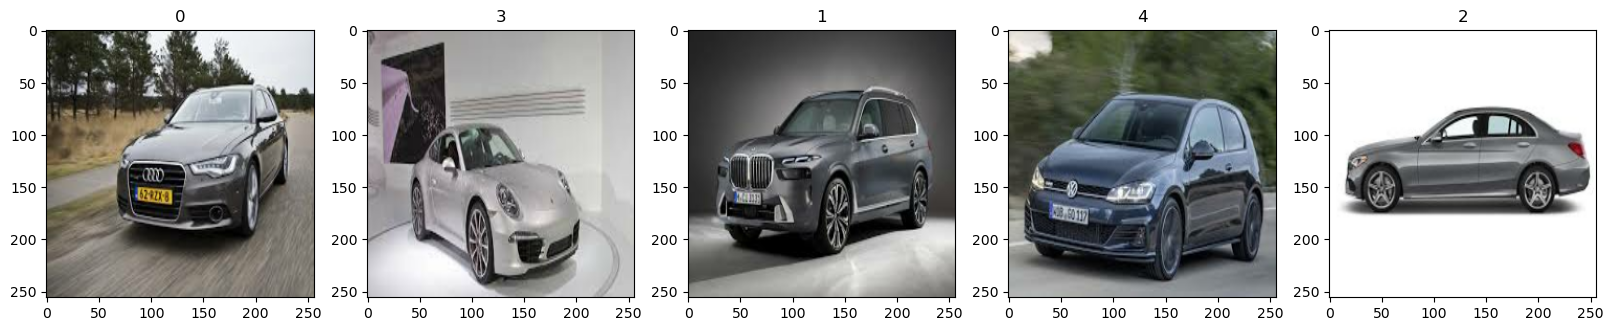

In [49]:
fig,  ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [15]:
batch_size = 32
img_height = 256
img_width = 256

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Cars",
    validation_split= 0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size= batch_size
)

Found 3697 files belonging to 5 classes.
Using 2958 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "Cars",
    validation_split= 0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size= batch_size
)

Found 3697 files belonging to 5 classes.
Using 739 files for validation.


In [18]:
class_names = train_ds.class_names

2023-08-06 18:26:10.983973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


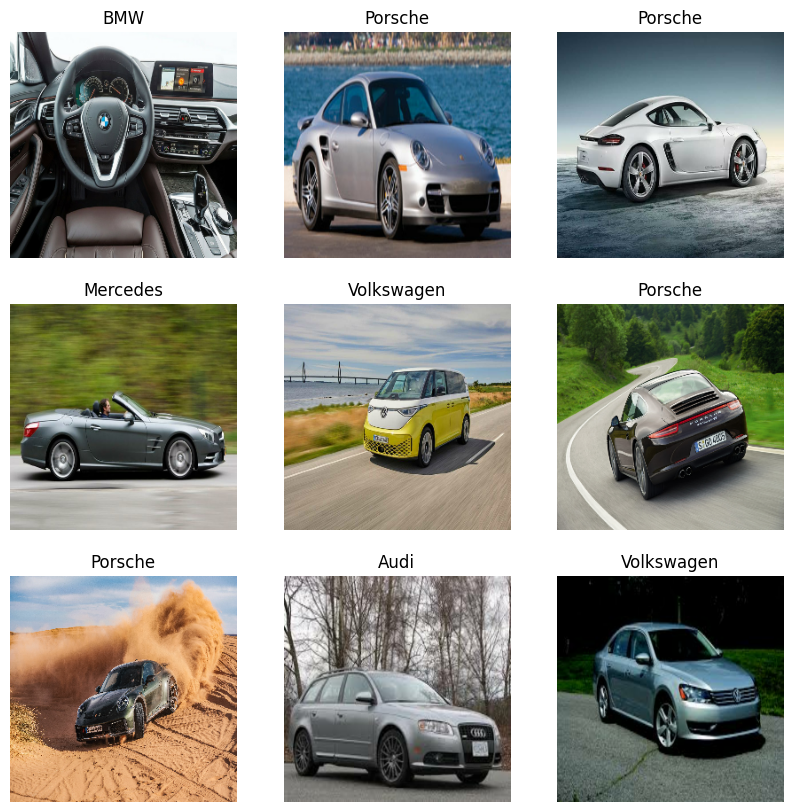

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Creating the model